# D2893 - Nitrogen quantitative analyses

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Set up to find custom python package
import os
import sys
import numpy as np
sys.path.insert(1, ".")
sys.path.insert(1, "..")

In [3]:
from src import readfiles, wdscan, correct_quant, calczaf, helper_funs
import pickle
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# Quantitative analysis

In [4]:
sample = 'D2893'
sample_folders = [Path(f'../data/raw/basaltic_glasses_StA/raw_quant_by_sample/{sample}/')]
# List of folders corresponding to the samples
category = 'basaltic glasses' # Category of this dataset (e.g. "glasses")
wd_scan = Path(f'../data/interim/basaltic_glasses/fits/key_params_{sample}.txt') # Path to wd scan fit parameters
std_dbase_info_file = Path('data/_dictionaries/standards.csv')

In [5]:
datalist = readfiles.find_files_and_folders(
                [sample], sample_folders,
                # apf_file = None,
                apf_file=Path('../data/_dictionaries/apf_values.csv'), #<- Can put None in here
                wd_scan=wd_scan
                )

datalist

Comments found: ['D2893_100nA_30um_1', 'D2893_100nA_30um_2', 'D2893_100nA_30um_3', 'D2893_100nA_30um_4', 'D2893_100nA_30um_5', 'D2893_50nA_20um_1', 'D2893_50nA_20um_146.6_180s_1', 'D2893_50nA_20um_146.6_180s_10', 'D2893_50nA_20um_146.6_180s_2', 'D2893_50nA_20um_146.6_180s_3', 'D2893_50nA_20um_146.6_180s_4', 'D2893_50nA_20um_146.6_180s_5', 'D2893_50nA_20um_146.6_180s_6', 'D2893_50nA_20um_146.6_180s_7', 'D2893_50nA_20um_146.6_180s_8', 'D2893_50nA_20um_146.6_180s_9', 'D2893_50nA_20um_2', 'D2893_50nA_20um_3', 'D2893_50nA_20um_4', 'D2893_50nA_20um_5', 'D2893_50nA_20um_6']


,folder,comment,sample,paramfile,apf,apf_sd
0,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,D2893_100nA_30um_1,D2893,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
1,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,D2893_100nA_30um_2,D2893,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
2,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,D2893_100nA_30um_3,D2893,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
3,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,D2893_100nA_30um_4,D2893,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
4,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,D2893_100nA_30um_5,D2893,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
5,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,D2893_50nA_20um_1,D2893,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
6,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,D2893_50nA_20um_146.6_180s_1,D2893,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
7,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,D2893_50nA_20um_146.6_180s_10,D2893,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
8,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,D2893_50nA_20um_146.6_180s_2,D2893,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
9,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,D2893_50nA_20um_146.6_180s_3,D2893,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2


In [6]:
myspot = [None] * len(datalist.folder)

for i in range(len(datalist.folder)):
    peak, bg, standard, info = readfiles.read_and_organise_data(
                                    datalist.loc[i,:].copy(),
                                    bgi=False,
                                    save=False)
    myspot[i] = correct_quant.Spot()
    myspot[i].add_data(info, bg, peak, standard)
    myspot[i].add_wd_scan_params_from_file(wd_scan)
    print('Read dataset:', i + 1, 'of', len(datalist), ':',
          myspot[i].info.comment)
    myspot[i].comprehensify_data()


 loading path: ..\data\interim\basaltic_glasses\fits\key_params_D2893.txt
{'sigma': 0.07848146191124306, 'center': 108.03836265280688}
Read dataset: 1 of 21 : D2893_100nA_30um_1

 loading path: ..\data\interim\basaltic_glasses\fits\key_params_D2893.txt
{'sigma': 0.07848146191124306, 'center': 108.03836265280688}
Read dataset: 2 of 21 : D2893_100nA_30um_2

 loading path: ..\data\interim\basaltic_glasses\fits\key_params_D2893.txt
{'sigma': 0.07848146191124306, 'center': 108.03836265280688}
Read dataset: 3 of 21 : D2893_100nA_30um_3

 loading path: ..\data\interim\basaltic_glasses\fits\key_params_D2893.txt
{'sigma': 0.07848146191124306, 'center': 108.03836265280688}
Read dataset: 4 of 21 : D2893_100nA_30um_4

 loading path: ..\data\interim\basaltic_glasses\fits\key_params_D2893.txt
{'sigma': 0.07848146191124306, 'center': 108.03836265280688}
Read dataset: 5 of 21 : D2893_100nA_30um_5

 loading path: ..\data\interim\basaltic_glasses\fits\key_params_D2893.txt
{'sigma': 0.07848146191124306,

In [7]:
correct_quant.process_datasets(
    myspot, 
    datalist, 
    num_mc_sims=100, 
    path_out=Path(f"../data/processed/basaltic_glasses/background_corrections/{sample}")
    )


Processing dataset: 1 of 21 : D2893_100nA_30um_1
Correcting background
Saved bg correction figure for 2021-12-22_D2893_100nA_30um_1
Resample cps to check stdev method
Montecarlo background correction
monte-carlo loop 0 of 100
monte-carlo loop 50 of 100
Saved montecarlo bg correction figure for 2021-12-22_D2893_100nA_30um_1
correct height/area ratio
original kraw: 0.00 ± 100.00%
corrected kraw: 0.41 ± 28.74%

Processing dataset: 2 of 21 : D2893_100nA_30um_2
Correcting background
Saved bg correction figure for 2021-12-22_D2893_100nA_30um_2
Resample cps to check stdev method
Montecarlo background correction
monte-carlo loop 0 of 100
monte-carlo loop 50 of 100
Saved montecarlo bg correction figure for 2021-12-22_D2893_100nA_30um_2
correct height/area ratio
original kraw: 0.00 ± 100.00%
corrected kraw: 0.39 ± 29.28%

Processing dataset: 3 of 21 : D2893_100nA_30um_3
Correcting background
Saved bg correction figure for 2021-12-22_D2893_100nA_30um_3
Resample cps to check stdev method
Montecar

## Write calczaf file

In [8]:
samples = [sample]
category = 'basaltic glasses'
subfolder = Path(f'../data/processed/basaltic_glasses/calczaf_files/{sample}/')

write_detection_limit_calczaf_files = True
detlim_subfolder = subfolder / Path('detlim')

# note: in the subfolder there must be a file specifying valence.
# this can be copied from the _dictionaries folder.
valence_dict = readfiles.read_valence_file(subfolder, pattern='valence*')
standard_database_dict = pd.read_csv(
    '../data/_dictionaries/standards.csv',
     index_col=0, 
     header=None, 
     squeeze=True).to_dict()

standard_database_dict

{'Sanidine': 3000,
 'Diopside': 3001,
 '08_Pollucite': 3002,
 'Albite': 3003,
 'GaN': 608,
 '22_Mo': 542,
 '09_Vanadium_Wire_Alfa': 523,
 'BN': 604}

In [9]:
# Make a dictionary
sampledata = {sample: myspot}

Get the major element analyses

In [10]:
majors_summary = pd.read_csv(
    "../data/processed/basaltic_glasses/basaltic_glasses_majors_summary.csv",
    header = [0, 1], index_col=0)
majors_summary[sample]

,wt% mean,stdev
Si,22.142,0.032
Al,7.870,0.021
Cl,1.015,0.006
P,0.083,0.003
Fe,5.756,0.015
Mn,0.245,0.011
Cr,0.045,0.006
K,0.162,0.006
Ca,10.141,0.032
Ru,0.012,0.008


In [11]:
# Remove Oxygen and Total from the dataframe to get all other element values
majors_relevant = majors_summary[sample].loc[
    majors_summary[sample].index[~majors_summary[sample].index.isin(["O", "Total"])],
    "wt% mean",
]
majors_relevant

Si    22.142
Al     7.870
Cl     1.015
P      0.083
Fe     5.756
Mn     0.245
Cr     0.045
K      0.162
Ca    10.141
Ru     0.012
Na     1.261
Mg     5.219
Name: wt% mean, dtype: float64

In [12]:
# For multiple different methods of processing the data, add a description
run_descriptor = ['_1_base', '_2_bg', '_3_bg_apf']  
# Leave as a list of an empty string if not using: e.g. run_descriptor = ['']

for i in range(len(samples)):

    # Here we pass in these arguments as a dictionary - this is useful in order
    # to reuse the arguments for the detection limit function. But you can
    # alternatively pass in each argument just by defining it in the function
    # as normal (see glasses example).

    args = {
              'elementByDifference' : 'h' # string element symbol
            , 'elementByStoichToStoichOxygen' : None # string element symbol
            , 'stoichOxygenRatio' : 0
            # for hyalophane there is H
            # that can be defined stoichiometrically relative to N:
            , 'elementByStoichToOtherElement' : None
            , 'OtherElement' : None
            , 'stoichElementRatio' : None

            , 'correct_bg' : False
            , 'correct_apf' : False

            # Elements to omit from matrix correction
            # (e.g. if analysed but not actually present in sample)
            , 'remove_elements' : None

            , 'definedElements' : majors_relevant.index # list of element symbols to add
            , 'definedElementWts' : majors_relevant.values # list of known element wt% to add
            }
    
    # Make copies of args with different values
    args2 = args.copy()
    args2["correct_bg"] = True
    args2["correct_apf"] = False

    args3 = args2.copy()
    args3["correct_bg"] = True
    args3["correct_apf"] = True

    args_list = [args, args2, args3]

    for j in range(len(run_descriptor)):
        print("******************************************************")
        print(args_list[j]["correct_bg"], args_list[j]["correct_apf"])
        print("******************************************************")

        calczaf_path_out = subfolder / '{}{}.dat'.format(
                                            samples[i], run_descriptor[j])
        open(calczaf_path_out, 'w').close()  # Erase contents of file

        if write_detection_limit_calczaf_files:
            
            detlim_path_out = detlim_subfolder / '{}{}_detlim.dat'.format(
                                            samples[i], run_descriptor[j])
            open(detlim_path_out, 'w').close()  # Erase contents of file

        for spot in sampledata[samples[i]]:

            calczaf.write_calczaf_input(
                spot, calczaf_path_out, valence_dict, standard_database_dict,
                accV=10, calcMode=2, taAngle=40, Oxide_or_Element=1,
                **args_list[j]) # <- **args unpacks the args dictionary defined earlier
                # so that all those arguments are passed into the function
                # without the need to type them all out.

            if write_detection_limit_calczaf_files:
                if args_list[j]['correct_bg']:

                    detlim_spot = correct_quant.create_detection_limit_spot(spot)

                    calczaf.write_calczaf_input(
                        detlim_spot, detlim_path_out, valence_dict, 
                        standard_database_dict,
                        accV=10, calcMode=2, taAngle=40, Oxide_or_Element=1,
                        **args_list[j])
                    
                else:
                    print('\n\nWarning: Not writing detection limit file.' 
                            'Calculating detection limit does not make sense'
                            ' except on background-corrected data. Raw data files' 
                            ' contain an estimate of detection limit without bg'
                            ' correction.\n')
                    
    

******************************************************
False False
******************************************************
Wrote CALCZAF file for D2893_100nA_30um_1 to ..\data\processed\basaltic_glasses\calczaf_files\D2893\D2893_1_base.dat



Wrote CALCZAF file for D2893_100nA_30um_2 to ..\data\processed\basaltic_glasses\calczaf_files\D2893\D2893_1_base.dat



Wrote CALCZAF file for D2893_100nA_30um_3 to ..\data\processed\basaltic_glasses\calczaf_files\D2893\D2893_1_base.dat



Wrote CALCZAF file for D2893_100nA_30um_4 to ..\data\processed\basaltic_glasses\calczaf_files\D2893\D2893_1_base.dat



Wrote CALCZAF file for D2893_100nA_30um_5 to ..\data\processed\basaltic_glasses\calczaf_files\D2893\D2893_1_base.dat



Wrote CALCZAF file for D2893_50nA_20um_1 to ..\data\processed\basaltic_glasses\calczaf_files\D2893\D2893_1_base.dat



Wrote CALCZAF file for D2893_50nA_20um_146.6_180s_1 to ..\data\processed\basaltic_glasses\calczaf_files\D2893\D2893_1_base.dat



Wrote CALCZAF file for D2893_

## Process calczaf outputs

In [13]:
folderpath = Path(f'../data/processed/basaltic_glasses/calczaf_files/{sample}/')

helper_funs.check_calczaf_folder_exists(folderpath)
valence_file = sorted(folderpath.glob('valence*'))[0]

results = calczaf.process_calczaf_outputs(folderpath, valence_file)

# For detection limits

results_detlim = calczaf.process_calczaf_outputs(folderpath / 'detlim/', valence_file, detlim=True)

[                     0           1           2           3           4           5           6           7           8           9   ...          11          12          13          14          15          16          17          18          19          20
wt% element                                                                                                                          ...                                                                                                                        
Si            22.142000   22.142000   22.142000   22.142000   22.142000   22.142000   22.142000   22.142000   22.142000   22.142000  ...   22.142000   22.142000   22.142000   22.142000   22.142000   22.142000   22.142000   22.142000   22.142000   22.142000
Al             7.870000    7.870000    7.870000    7.870000    7.870000    7.870000    7.870000    7.870000    7.870000    7.870000  ...    7.870000    7.870000    7.870000    7.870000    7.870000    7.870000    7.870000    7.87

Produce summaries

In [14]:
summary_tables = correct_quant.write_summary_excel_tables(
    myspot, 
    f"../data/processed/basaltic_glasses/kraw_summaries_{sample}.xlsx"
    )

typical_kratios = pd.DataFrame({
    "K-ratio": [
        summary_tables[0]["original.kraw_pcnt"].mean(),
        summary_tables[0]["montecarlo.kraw_pcnt"].mean(),
        summary_tables[0]["montecarlo.kraw_apf_pcnt"].mean()
    ],
    "Stdev % (relative)": [
        max(
            summary_tables[0]["original.kraw_stdev_pcnt"].mean(),
            summary_tables[0]["original.kraw_pcnt"].std()
            ),
        max(
            summary_tables[0]["montecarlo.kraw_stdev_pcnt"].mean(),
            summary_tables[0]["montecarlo.kraw_pcnt"].std()
            ),
        max(
            summary_tables[0]["montecarlo.kraw_stdev_apf_pcnt"].mean(),
            summary_tables[0]["montecarlo.kraw_apf_pcnt"].std()
            )
    ]
}, index = [
    "Original K-ratio (%)", 
    "Bg-corrected K-ratio (%)", 
    "Bg- and APF-corrected K-ratio (%)"
    ]
)

typical_kratios.insert(
    1, 
    column="Stdev (absolute)", 
    value = typical_kratios["K-ratio"] * typical_kratios["Stdev % (relative)"] / 100
    )

typical_kratios["filename"] = results["wtdata"].keys()
typical_kratios.reset_index(inplace=True)
typical_kratios.set_index("filename", inplace=True)
        # .loc[nm, "Stdev % (relative)"]/100
# )
typical_kratios


,index,K-ratio,Stdev (absolute),Stdev % (relative)
filename,,,,
D2893_1_base,Original K-ratio (%),0.000000,0.000000,100.000000
D2893_2_bg,Bg-corrected K-ratio (%),0.280476,0.089830,32.027619
D2893_3_bg_apf,Bg- and APF-corrected K-ratio (%),0.337619,0.141659,41.958095


Plot all spots grouped by their method with stdev and detlims

In [27]:
suffix = "3_bg_apf"
stdev_string = "kraw_stdev_apf_pcnt"

In [28]:
results["wtdata"][f"{sample}_{suffix}"]

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,average,stdev,minimum,maximum
wt% element,,,,,,,,,,,,,,,,,,,,,
Si,22.142000,22.142000,22.142000,22.142000,22.142000,22.142000,22.142000,22.142000,22.142000,22.142000,...,22.142000,22.142000,22.142000,22.142000,22.142000,22.142000,22.142000,0.000000e+00,22.142000,22.142000
Al,7.870000,7.870000,7.870000,7.870000,7.870000,7.870000,7.870000,7.870000,7.870000,7.870000,...,7.870000,7.870000,7.870000,7.870000,7.870000,7.870000,7.870000,0.000000e+00,7.870000,7.870000
Ca,10.141000,10.141000,10.141000,10.141000,10.141000,10.141000,10.141000,10.141000,10.141000,10.141000,...,10.141000,10.141000,10.141000,10.141000,10.141000,10.141000,10.141000,1.820224e-15,10.141000,10.141000
Mg,5.219000,5.219000,5.219000,5.219000,5.219000,5.219000,5.219000,5.219000,5.219000,5.219000,...,5.219000,5.219000,5.219000,5.219000,5.219000,5.219000,5.219000,1.820224e-15,5.219000,5.219000
Fe,5.756000,5.756000,5.756000,5.756000,5.756000,5.756000,5.756000,5.756000,5.756000,5.756000,...,5.756000,5.756000,5.756000,5.756000,5.756000,5.756000,5.756000,0.000000e+00,5.756000,5.756000
Mn,0.245000,0.245000,0.245000,0.245000,0.245000,0.245000,0.245000,0.245000,0.245000,0.245000,...,0.245000,0.245000,0.245000,0.245000,0.245000,0.245000,0.245000,2.844100e-17,0.245000,0.245000
K,0.162000,0.162000,0.162000,0.162000,0.162000,0.162000,0.162000,0.162000,0.162000,0.162000,...,0.162000,0.162000,0.162000,0.162000,0.162000,0.162000,0.162000,2.844100e-17,0.162000,0.162000
Na,1.261000,1.261000,1.261000,1.261000,1.261000,1.261000,1.261000,1.261000,1.261000,1.261000,...,1.261000,1.261000,1.261000,1.261000,1.261000,1.261000,1.261000,2.275280e-16,1.261000,1.261000
H,0.348079,0.348397,0.347199,0.349302,0.349004,0.352381,0.347950,0.347108,0.350376,0.350555,...,0.349743,0.350264,0.354150,0.351429,0.353686,0.348474,0.349590,2.006180e-03,0.347108,0.354150


In [29]:
N_by_method = pd.DataFrame(
    {"comment": datalist["comment"],
     "N wt": results["wtdata"][f"{sample}_{suffix}"].loc["N", list(range(0, len(datalist.index)))],
     "N detlim": results_detlim["wtdata"][f"{sample}_{suffix}_detlim"].loc["N", list(range(0, len(datalist.index)))], 
     "N stdev pct": summary_tables[0][f"montecarlo.{stdev_string}"],
     "N stdev abs": (
         results["wtdata"][f"{sample}_{suffix}"]
        .loc["N", list(range(0, len(datalist.index)))] * 
        summary_tables[0][f"montecarlo.{stdev_string}"]/100
        )
     }
     )

N_by_method["method"] = N_by_method["comment"].str.replace(r'_[0-9]+$', '', regex=True)
N_by_method.groupby("method")["N wt"].mean()

method
D2893_100nA_30um              0.075987
D2893_50nA_20um               0.046186
D2893_50nA_20um_146.6_180s    0.071470
Name: N wt, dtype: float64

In [30]:
N_by_method.round(3).sort_values("method")

,comment,N wt,N detlim,N stdev pct,N stdev abs,method
0,D2893_100nA_30um_1,0.079,0.017,28.74,0.023,D2893_100nA_30um
1,D2893_100nA_30um_2,0.076,0.018,29.28,0.022,D2893_100nA_30um
2,D2893_100nA_30um_3,0.087,0.018,27.35,0.024,D2893_100nA_30um
3,D2893_100nA_30um_4,0.068,0.024,31.09,0.021,D2893_100nA_30um
4,D2893_100nA_30um_5,0.071,0.019,31.62,0.022,D2893_100nA_30um
18,D2893_50nA_20um_4,0.049,0.030,58.55,0.029,D2893_50nA_20um
17,D2893_50nA_20um_3,0.025,0.035,109.49,0.027,D2893_50nA_20um
16,D2893_50nA_20um_2,0.059,0.031,51.93,0.031,D2893_50nA_20um
19,D2893_50nA_20um_5,0.029,0.029,90.77,0.026,D2893_50nA_20um
20,D2893_50nA_20um_6,0.075,0.031,44.24,0.033,D2893_50nA_20um


Text(0.5, 1.0, 'D2893')

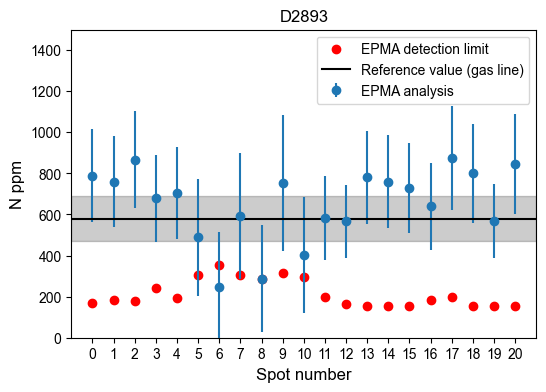

In [31]:
N_by_method_sorted = N_by_method.sort_values("method").reset_index()

plt.errorbar(
    x=N_by_method_sorted.index, 
    y=N_by_method_sorted["N wt"] * 10000, 
    yerr=N_by_method_sorted["N stdev abs"] * 10000,
    marker="o",
    linestyle="",
    label="EPMA analysis"
    )

plt.scatter(
    x=N_by_method_sorted.index,
    y=N_by_method_sorted["N detlim"]*10000,
    color="r",
    label="EPMA detection limit",
    zorder=0
)
plt.xticks(range(0,len(N_by_method_sorted.index)))
plt.ylim(0, 1500)
plt.ylabel("N ppm")
plt.xlabel("Spot number")

plt.axhline(y=580, color="k", label="Reference value (gas line)")
plt.axhspan(ymin=(580-110), ymax=(580+110), color="k", alpha=0.2)
plt.legend()
plt.title(sample)


In [32]:
wt_pct_summary_table = pd.concat(
    {k: v[["average", "stdev"]] for k, v in results["wtdata"].items()},
    axis=1
    ).round(3)

# wt_pct_summary_table.to_csv("../data/processed/hyalophane_StA/wt_pct_summary_GaNcalib.csv")

wt_pct_summary_table


D2893_1_base       D2893_2_bg        D2893_3_bg_apf       
                 average stdev    average  stdev        average  stdev
wt% element                                                           
Si                22.142   0.0     22.142  0.000         22.142  0.000
Al                 7.870   0.0      7.870  0.000          7.870  0.000
Ca                10.141   0.0     10.141  0.000         10.141  0.000
Mg                 5.219   0.0      5.219  0.000          5.219  0.000
Fe                 5.756   0.0      5.756  0.000          5.756  0.000
Mn                 0.245   0.0      0.245  0.000          0.245  0.000
K                  0.162   0.0      0.162  0.000          0.162  0.000
Na                 1.261   0.0      1.261  0.000          1.261  0.000
H                  0.357   0.0      0.351  0.002          0.350  0.002
N                  0.000   0.0      0.054  0.015          0.065  0.018
P                  0.083   0.0      0.083  0.000          0.083  0.000
Cl                 1.015   0.0      1.015  0.000          1.015  0.000
Cr                 0.045   0.0      0.045  0.000          0.045  0.000
Ru                 0.012   0.0      0.012  0.000          0.012  0.000
O                 45.692   0.0     45.644  0.013         45.634  0.016
TOTAL            100.000   0.0    100.000  0.000        100.000  0.000

This is with hydrogen by difference.